# Kompetisi Data Analyst: Digital Marketing Performance Optimization
- **Nama:** Rodiah Hasan Alaydrus
- **Email:** diahalaydrus1904@gmail.com
- **No. Telp:** 087887017444

## Pertanyaan Bisnis

A. Performance Metrics Analysis
1. Berapa nilai CTR (Click-Through Rate) secara keseluruhan?
2. Bagaimana performa CTR berdasarkan campaign objective (Traffic vs Sales)?
3. Berapa total Purchase Value (Omzet) yang dihasilkan dari iklan?
4. Berapa nilai ROAS (Return on Advertising Spend) secara keseluruhan?

B. Trend & Time Series Analysis
1. Bagaimana tren performa iklan dari waktu ke waktu?
2. Pada periode atau bulan apa performa iklan mengalami peningkatan signifikan?
3. Apakah terdapat pola musiman (seasonality) yang mempengaruhi omzet iklan?

C. Industry & Account Analysis
1. Industri apa yang memiliki nilai rata-rata omzet tertinggi?
2. Akun atau brand mana yang paling efektif menghasilkan revenue?
3. Industri mana yang memiliki nilai ROAS tertinggi?

## Import Semua Packages/Library yang Digunakan

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import seaborn as sns
import json

## Data Wrangling

### Memuat Data

In [31]:
# Membuat data ads
file_id = "1SN6BBUyObFYbNlSkQ3NvGk55-Xh0mywb"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)
df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0


### Menilai Data

In [32]:
# Memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_date        4380 non-null   object 
 1   account_name        4380 non-null   object 
 2   campaign_objective  4380 non-null   object 
 3   impressions         4380 non-null   float64
 4   reach               4380 non-null   float64
 5   clicks              4380 non-null   float64
 6   link_clicks         4380 non-null   float64
 7   content_views       4380 non-null   float64
 8   add_to_cart         4380 non-null   float64
 9   purchase            4380 non-null   float64
 10  purchase_value      4380 non-null   float64
 11  amount_spent        4380 non-null   float64
dtypes: float64(9), object(3)
memory usage: 410.8+ KB


In [33]:
# Memeriksa jumlah null values
df.isna().sum()

,0
created_date,0
account_name,0
campaign_objective,0
impressions,0
reach,0
clicks,0
link_clicks,0
content_views,0
add_to_cart,0
purchase,0


In [34]:
# Memeriksa jumlah duplikasi
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
# Memeriksa parameter statistik dari kolom numerik
df.describe()

,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
count,4.380000e+03,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03,4.380000e+03
mean,6.509784e+05,319465.963721,64658.303105,32284.340525,3270.216758,329.622032,299.895434,2.385893e+06,2.957227e+06
std,3.561788e+05,177837.971292,35658.804018,17818.611700,4149.902583,416.383348,401.934926,3.200339e+06,1.858174e+06
min,1.003580e+05,50134.000000,10029.000000,5008.000000,0.000000,0.000000,0.000000,0.000000e+00,1.014850e+05
25%,3.682400e+05,178756.300000,36632.250000,17758.200000,0.000000,0.000000,0.000000,0.000000e+00,1.474532e+06
50%,6.193560e+05,305107.500000,61225.000000,30892.500000,505.000000,50.000000,5.000000,5.176000e+04,2.856742e+06
75%,8.774980e+05,428148.125000,86084.450000,43292.750000,6296.150000,630.000000,560.250000,4.531508e+06,4.153663e+06
max,1.998018e+06,998320.000000,199252.000000,99554.000000,19964.000000,1992.000000,1980.000000,1.590125e+07,9.970642e+06


### Membersihkan Data

In [36]:
# Mengubah datatype kolumn created date menjadi datetime
df['created_date'] = pd.to_datetime(df['created_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_date        4380 non-null   datetime64[ns]
 1   account_name        4380 non-null   object        
 2   campaign_objective  4380 non-null   object        
 3   impressions         4380 non-null   float64       
 4   reach               4380 non-null   float64       
 5   clicks              4380 non-null   float64       
 6   link_clicks         4380 non-null   float64       
 7   content_views       4380 non-null   float64       
 8   add_to_cart         4380 non-null   float64       
 9   purchase            4380 non-null   float64       
 10  purchase_value      4380 non-null   float64       
 11  amount_spent        4380 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 410.8+ KB


## Exploratory Data Analysis (EDA)

In [37]:
# Menampilkan 5 data paling atas
df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0


In [38]:
# Melakukan statistik deskriptif dan ringkasan seluruh kolom
df.describe(include="all")

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
count,4380,4380,4380,4.380000e+03,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03,4.380000e+03
unique,NaN,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Client A - Fashion,Traffic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,730,2190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023-07-02 00:00:00,NaN,NaN,6.509784e+05,319465.963721,64658.303105,32284.340525,3270.216758,329.622032,299.895434,2.385893e+06,2.957227e+06
min,2023-01-01 00:00:00,NaN,NaN,1.003580e+05,50134.000000,10029.000000,5008.000000,0.000000,0.000000,0.000000,0.000000e+00,1.014850e+05
25%,2023-04-02 00:00:00,NaN,NaN,3.682400e+05,178756.300000,36632.250000,17758.200000,0.000000,0.000000,0.000000,0.000000e+00,1.474532e+06
50%,2023-07-02 00:00:00,NaN,NaN,6.193560e+05,305107.500000,61225.000000,30892.500000,505.000000,50.000000,5.000000,5.176000e+04,2.856742e+06
75%,2023-10-01 00:00:00,NaN,NaN,8.774980e+05,428148.125000,86084.450000,43292.750000,6296.150000,630.000000,560.250000,4.531508e+06,4.153663e+06
max,2023-12-31 00:00:00,NaN,NaN,1.998018e+06,998320.000000,199252.000000,99554.000000,19964.000000,1992.000000,1980.000000,1.590125e+07,9.970642e+06


In [39]:
# Analisis per klien: statistik total revenue dan total biaya iklan (maksimum, minimum, rata-rata, dan standar deviasi)
df.groupby(by="account_name").agg({
    "purchase_value": ["max", "min", "mean", "std"],
    "amount_spent": ["max", "min", "mean", "std"]
})

purchase_value                                   \
                              max  min          mean           std   
account_name                                                         
Client A - Fashion     15901248.0  0.0  2.341957e+06  3.136966e+06   
Client B - Beauty      15460304.0  0.0  2.383526e+06  3.135341e+06   
Client C - Fashion     15778834.0  0.0  2.437948e+06  3.353241e+06   
Client D - Beauty      15895534.0  0.0  2.414360e+06  3.236859e+06   
Client E - FMCG        15336342.0  0.0  2.382939e+06  3.133591e+06   
Client F - FMCG        15646960.0  0.0  2.354630e+06  3.210143e+06   

                   amount_spent                                        
                            max       min          mean           std  
account_name                                                           
Client A - Fashion    9944068.0  112615.0  3.045716e+06  1.828562e+06  
Client B - Beauty     9340752.0  107801.0  2.868843e+06  1.795884e+06  
Client C - Fashion    9970642.0  106199.0  2.915061e+06  1.897115e+06  
Client D - Beauty     9785694.0  104007.0  3.033812e+06  1.942709e+06  
Client E - FMCG       9969022.0  103653.0  2.931867e+06  1.822015e+06  
Client F - FMCG       9818436.0  101485.0  2.948065e+06  1.858700e+06

In [40]:
# Mengagregasi setiap tahap funnel untuk melihat penurunan dari impresi hingga pembelian.
df.groupby(lambda x: 'all').agg(
    impressions=('impressions', 'sum'),
    clicks=('clicks', 'sum'),
    content_views=('content_views', 'sum'),
    add_to_cart=('add_to_cart', 'sum'),
    purchases=('purchase', 'sum')
)

,impressions,clicks,content_views,add_to_cart,purchases
all,2.851285e+09,283203367.6,14323549.4,1443744.5,1313542.0


In [41]:
# Membandingkan performa campaign berdasarkan objective menggunakan metrik volume, biaya, dan revenue.
df.groupby('campaign_objective').agg(
    impressions=('impressions', 'sum'),
    clicks=('clicks', 'sum'),
    content_views=('content_views', 'sum'),
    add_to_cart=('add_to_cart', 'sum'),
    purchases=('purchase', 'sum'),
    spend=('amount_spent', 'sum'),
    revenue=('purchase_value', 'sum')
)

,impressions,clicks,content_views,add_to_cart,purchases,spend,revenue
campaign_objective,,,,,,,
Sales,1.424287e+09,140723327.8,14323549.4,1443744.5,1313542.0,6.457171e+09,1.045021e+10
Traffic,1.426999e+09,142480039.8,0.0,0.0,0.0,6.495484e+09,0.000000e+00


In [42]:
# Menganalisis kontribusi performa setiap account berdasarkan biaya dan revenue.
df.groupby('account_name').agg(
    impressions=('impressions', 'sum'),
    clicks=('clicks', 'sum'),
    purchases=('purchase', 'sum'),
    spend=('amount_spent', 'sum'),
    revenue=('purchase_value', 'sum')
).sort_values('revenue', ascending=False)

,impressions,clicks,purchases,spend,revenue
account_name,,,,,
Client C - Fashion,477241062.1,46275192.9,223261.8,2.127994e+09,1.779702e+09
Client D - Beauty,462938429.0,47945567.1,215499.3,2.214683e+09,1.762483e+09
Client B - Beauty,476927716.6,47261108.3,221735.7,2.094255e+09,1.739974e+09
Client E - FMCG,477225048.4,47083014.5,230344.4,2.140263e+09,1.739546e+09
Client F - FMCG,479994441.2,47778386.9,207729.7,2.152087e+09,1.718880e+09
Client A - Fashion,476958728.6,46860097.9,214971.1,2.223373e+09,1.709628e+09


<Axes: title={'center': 'Tren Performa Harian'}, xlabel='created_date'>

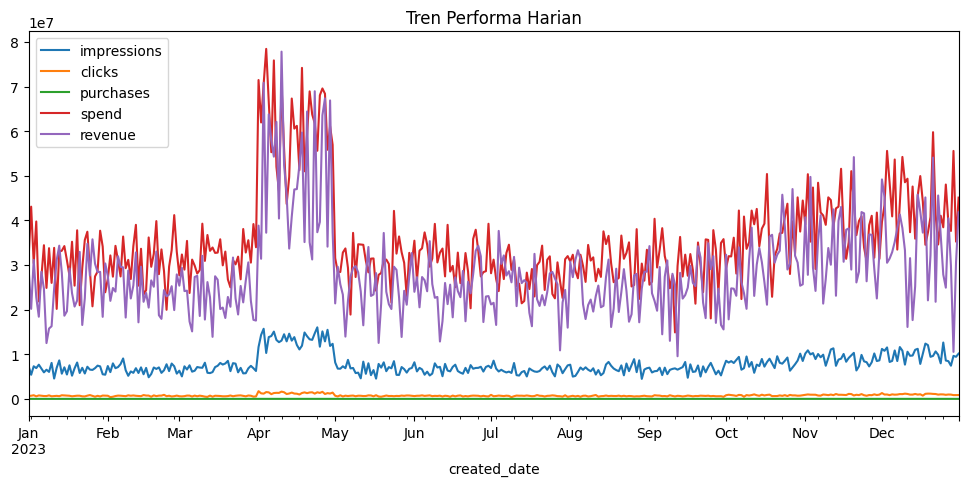

In [43]:
# Mengamati tren performa harian untuk mengidentifikasi pola dan fluktuasi dari waktu ke waktu.
df.groupby('created_date').agg(
    impressions=('impressions', 'sum'),
    clicks=('clicks', 'sum'),
    purchases=('purchase', 'sum'),
    spend=('amount_spent', 'sum'),
    revenue=('purchase_value', 'sum')
).plot(figsize=(12,5), title='Tren Performa Harian')

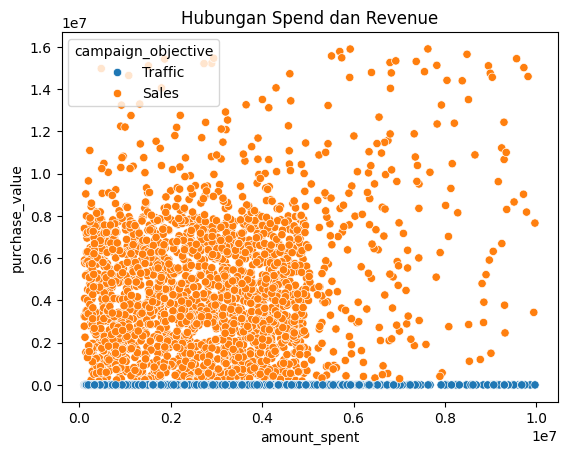

In [44]:
# Memvisualisasikan hubungan antara biaya iklan dan revenue untuk mengidentifikasi ketidakefisienan.
sns.scatterplot(
    data=df,
    x='amount_spent',
    y='purchase_value',
    hue='campaign_objective'
)
plt.title('Hubungan Spend dan Revenue')
plt.show()

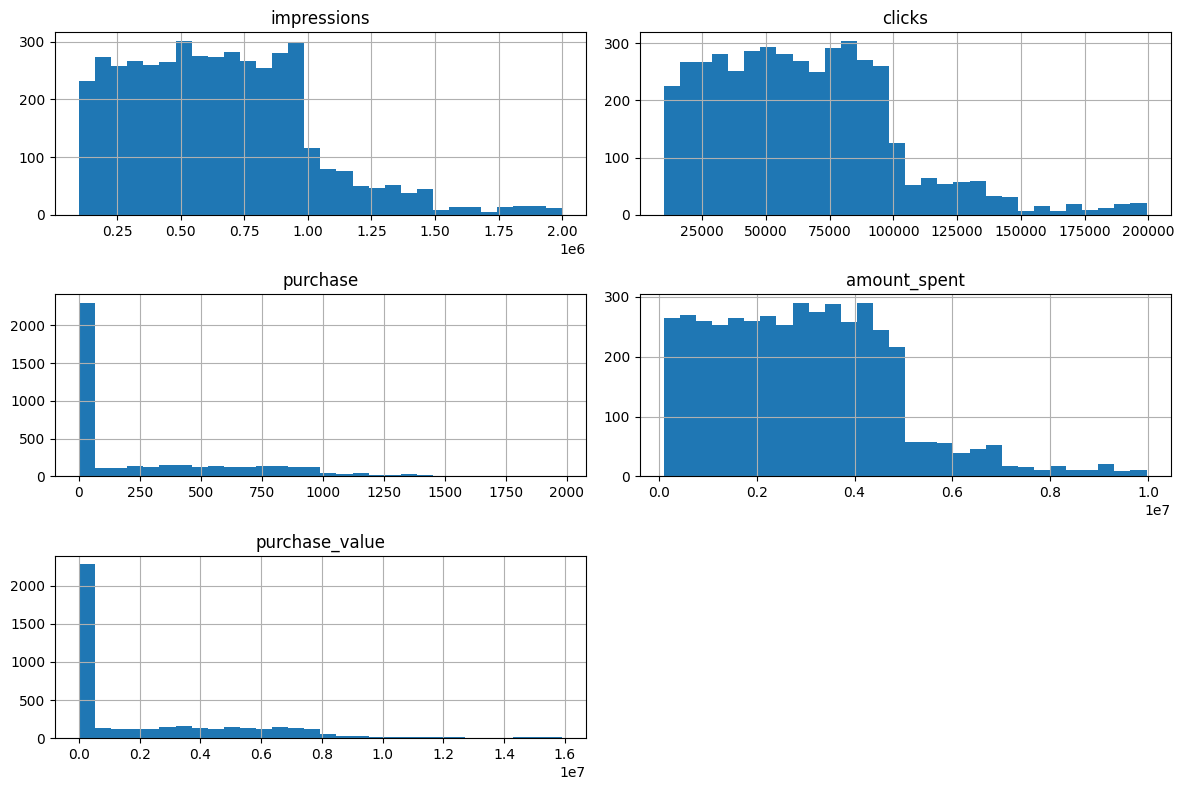

In [45]:
# Melihat distribusi data untuk mendeteksi skewness dan potensi outlier.
df[['impressions','clicks','purchase','amount_spent','purchase_value']].hist(
    bins=30,
    figsize=(12,8)
)
plt.tight_layout()
plt.show()

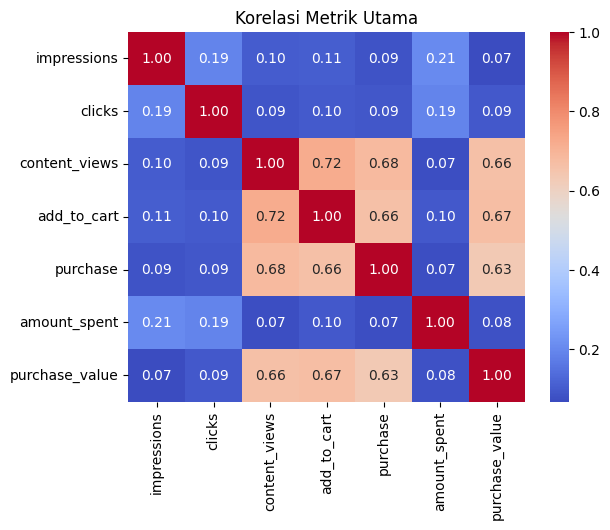

In [46]:
# Mengukur keterkaitan antar metrik utama untuk memahami hubungan antar variabel.
cols = [
    'impressions','clicks','content_views',
    'add_to_cart','purchase',
    'amount_spent','purchase_value'
]

sns.heatmap(
    df[cols].corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)
plt.title('Korelasi Metrik Utama')
plt.show()

In [47]:
# Mengidentifikasi campaign dengan kontribusi revenue tertinggi.
df.sort_values('purchase_value', ascending=False).head(10)

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
1129,2023-04-05,Client A - Fashion,Sales,1303122.0,174420.0,173900.0,97904.0,7604.0,812.0,1210.0,15901248.0,7626304.0
1195,2023-04-10,Client D - Beauty,Sales,1443586.0,803776.0,126916.0,74730.0,3428.0,1704.0,1662.0,15895534.0,5926044.0
1157,2023-04-07,Client C - Fashion,Sales,384212.0,759252.0,198132.0,37964.0,11848.0,1482.0,332.0,15778834.0,5697222.0
1427,2023-04-29,Client F - FMCG,Sales,1886632.0,970550.0,93188.0,46740.0,15950.0,658.0,298.0,15646960.0,8482696.0
1295,2023-04-18,Client F - FMCG,Sales,1279122.0,318478.0,84700.0,41854.0,19152.0,1558.0,888.0,15569576.0,5517446.0
1351,2023-04-23,Client D - Beauty,Sales,1588698.0,651586.0,49694.0,57992.0,19416.0,1774.0,368.0,15481698.0,5740742.0
1311,2023-04-20,Client B - Beauty,Sales,215458.0,645972.0,125630.0,38886.0,9154.0,1412.0,1940.0,15460304.0,2938214.0
1111,2023-04-03,Client D - Beauty,Sales,499410.0,806690.0,103010.0,62010.0,18686.0,1554.0,926.0,15439956.0,9568006.0
1189,2023-04-10,Client A - Fashion,Sales,860210.0,746420.0,191364.0,89916.0,3170.0,800.0,634.0,15422730.0,1864790.0
1401,2023-04-27,Client E - FMCG,Sales,253630.0,381742.0,74438.0,57788.0,19688.0,1480.0,512.0,15336342.0,6923562.0


In [48]:
# Mengidentifikasi campaign dengan penggunaan biaya terbesar.
df.sort_values('amount_spent', ascending=False).head(10)

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
1240,2023-04-14,Client C - Fashion,Traffic,926584.0,186918.0,164516.0,57522.0,0.0,0.0,0.0,0.0,9970642.0
1089,2023-04-01,Client E - FMCG,Sales,1325412.0,106304.0,135360.0,62828.0,8042.0,1934.0,724.0,7659610.0,9969022.0
1237,2023-04-14,Client A - Fashion,Sales,1048958.0,100428.0,98454.0,62234.0,6626.0,204.0,534.0,3432070.0,9944068.0
1148,2023-04-06,Client E - FMCG,Traffic,1905580.0,354766.0,57638.0,45974.0,0.0,0.0,0.0,0.0,9866512.0
1127,2023-04-04,Client F - FMCG,Sales,482340.0,855058.0,177582.0,60824.0,7648.0,864.0,388.0,14596162.0,9818436.0
1255,2023-04-15,Client D - Beauty,Sales,832678.0,743598.0,49436.0,12404.0,6646.0,516.0,790.0,8179702.0,9785694.0
1284,2023-04-18,Client A - Fashion,Traffic,1835756.0,895468.0,108624.0,81998.0,0.0,0.0,0.0,0.0,9749076.0
1391,2023-04-26,Client F - FMCG,Sales,1639858.0,706452.0,165834.0,12612.0,12152.0,1264.0,1496.0,15016386.0,9727254.0
1393,2023-04-27,Client A - Fashion,Sales,1440510.0,576986.0,111920.0,20236.0,2050.0,1012.0,1256.0,9023866.0,9719082.0
1362,2023-04-24,Client D - Beauty,Traffic,1670330.0,330218.0,191260.0,66998.0,0.0,0.0,0.0,0.0,9681008.0


## Visualization & Explanatory Analysis

### A. Performance Metrics Analysis

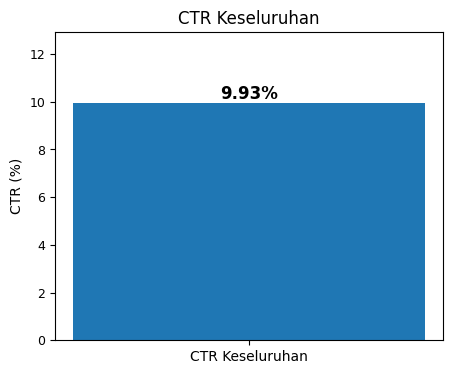

In [49]:
# A1. Visualisasi CTR keseluruhan
# Menampilkan satu metrik utama CTR keseluruhan dalam bentuk KPI

ctr_total = (df['clicks'].sum() / df['impressions'].sum()) * 100

plt.figure(figsize=(5, 4))
plt.bar(['CTR Keseluruhan'], [ctr_total])

plt.ylabel('CTR (%)')
plt.title('CTR Keseluruhan')

# Menampilkan nilai KPI di atas bar
plt.text(
    0,
    ctr_total,
    f'{ctr_total:.2f}%',
    ha='center',
    va='bottom',
    fontsize=12,
    fontweight='bold'
)

# Menyederhanakan tampilan (KPI-style)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.ylim(0, ctr_total * 1.3)

plt.show()

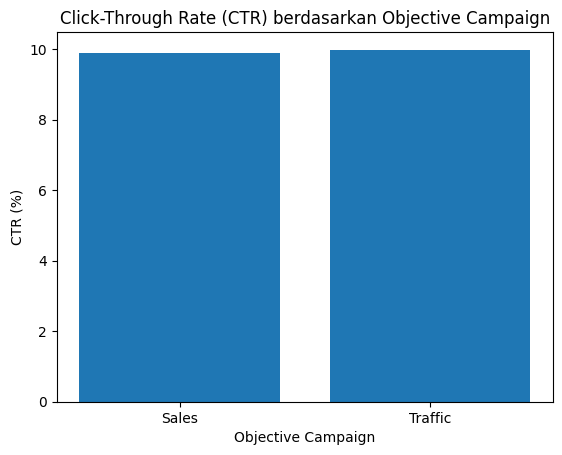

In [50]:
# A2. Visualisasi CTR berdasarkan objective campaign
# Membandingkan Click-Through Rate (CTR) antara Traffic dan Sales dalam persentase

grouped = (
    df.groupby('campaign_objective')[['clicks', 'impressions']]
      .sum()
)

ctr_by_objective = (grouped['clicks'] / grouped['impressions']) * 100

plt.figure()
plt.bar(ctr_by_objective.index, ctr_by_objective.values)
plt.xlabel('Objective Campaign')
plt.ylabel('CTR (%)')
plt.title('Click-Through Rate (CTR) berdasarkan Objective Campaign')
plt.show()

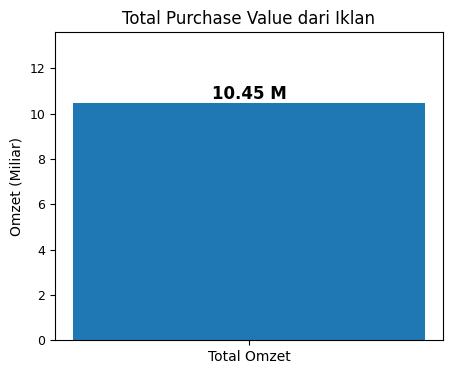

In [51]:
# A3. Visualisasi total purchase value (KPI Bar)
# Menampilkan total omzet iklan sebagai satu metrik utama (dalam miliar)

total_purchase_value = df['purchase_value'].sum() / 1_000_000_000

plt.figure(figsize=(5, 4))
plt.bar(['Total Omzet'], [total_purchase_value])

plt.ylabel('Omzet (Miliar)')
plt.title('Total Purchase Value dari Iklan')

# Menampilkan nilai KPI di atas bar
plt.text(
    0,
    total_purchase_value,
    f'{total_purchase_value:.2f} M',
    ha='center',
    va='bottom',
    fontsize=12,
    fontweight='bold'
)

# KPI-style cleanup
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.ylim(0, total_purchase_value * 1.3)

plt.show()

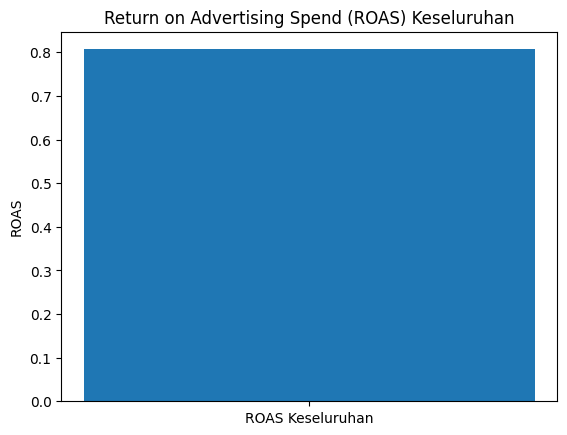

In [52]:
# A4. Visualisasi ROAS keseluruhan
# Mengukur efisiensi iklan berdasarkan perbandingan omzet dan biaya iklan

roas_total = df['purchase_value'].sum() / df['amount_spent'].sum()

plt.figure()
plt.bar(['ROAS Keseluruhan'], [roas_total])
plt.ylabel('ROAS')
plt.title('Return on Advertising Spend (ROAS) Keseluruhan')
plt.show()

### B. Trend & Time Series Analysis

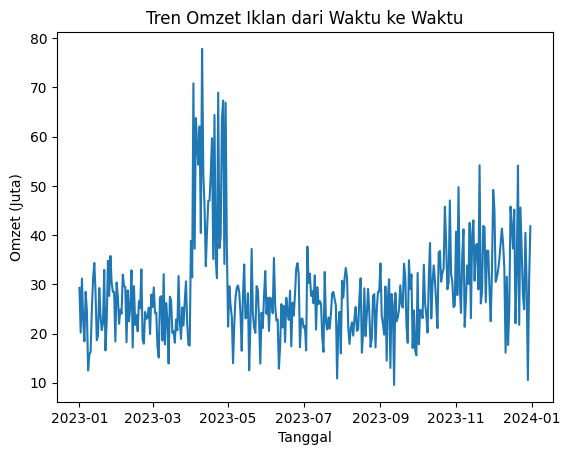

In [53]:
# B1. Visualisasi tren omzet dari waktu ke waktu
# Menampilkan perubahan omzet iklan berdasarkan tanggal campaign (dalam juta)

daily_revenue = df.groupby('created_date')['purchase_value'].sum() / 1_000_000

plt.figure()
plt.plot(daily_revenue.index, daily_revenue.values)
plt.xlabel('Tanggal')
plt.ylabel('Omzet (Juta)')
plt.title('Tren Omzet Iklan dari Waktu ke Waktu')
plt.show()

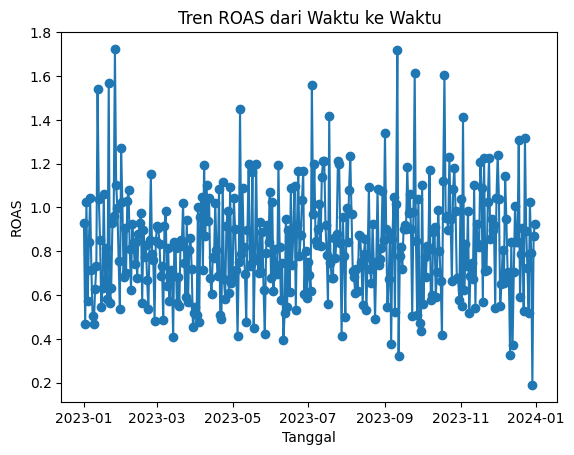

In [54]:
# B2. Visualisasi tren ROAS dari waktu ke waktu
# Mengidentifikasi perubahan efisiensi iklan berdasarkan waktu

grouped = (
    df.groupby('created_date')[['purchase_value', 'amount_spent']]
      .sum()
)

daily_roas = grouped['purchase_value'] / grouped['amount_spent']

plt.figure()
plt.plot(daily_roas.index, daily_roas.values, marker='o')
plt.xlabel('Tanggal')
plt.ylabel('ROAS')
plt.title('Tren ROAS dari Waktu ke Waktu')
plt.show()

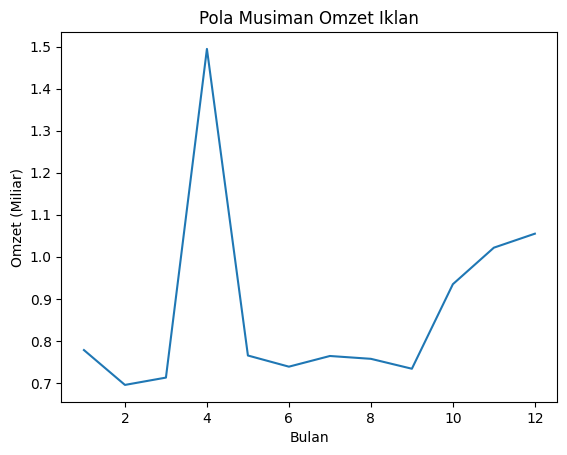

In [55]:
# B3. Visualisasi pola musiman omzet iklan
# Menampilkan total omzet per bulan dalam satuan miliar

df['month'] = df['created_date'].dt.month
monthly_revenue = (
    df.groupby('month')['purchase_value'].sum() / 1_000_000_000
)

plt.figure()
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Bulan')
plt.ylabel('Omzet (Miliar)')
plt.title('Pola Musiman Omzet Iklan')
plt.show()

### C. Industry & Account Analysis

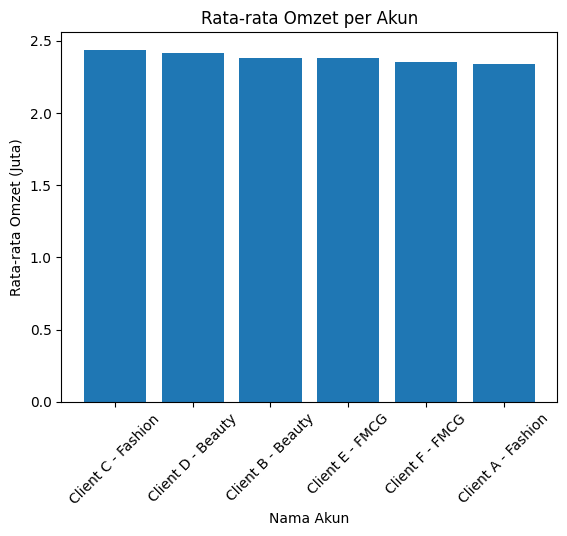

In [56]:
# C1. Visualisasi rata-rata omzet per akun
# Mengidentifikasi klien dengan rata-rata omzet tertinggi (dalam juta)

avg_revenue_account = (
    df.groupby('account_name')['purchase_value']
      .mean()
      .sort_values(ascending=False) / 1_000_000
)

plt.figure()
plt.bar(avg_revenue_account.index, avg_revenue_account.values)
plt.xlabel('Nama Akun')
plt.ylabel('Rata-rata Omzet (Juta)')
plt.title('Rata-rata Omzet per Akun')
plt.xticks(rotation=45)
plt.show()

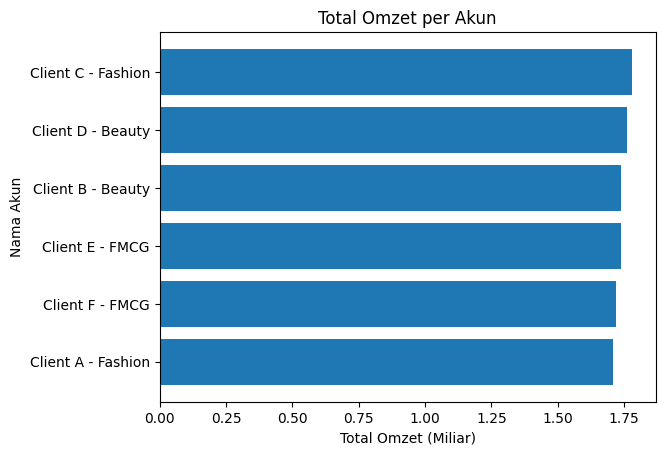

In [57]:
# C2. Visualisasi total omzet per akun
# Menampilkan akun dengan kontribusi omzet terbesar (dalam miliar)

total_revenue_account = (
    df.groupby('account_name')['purchase_value']
      .sum()
      .sort_values() / 1_000_000_000
)

plt.figure()
plt.barh(total_revenue_account.index, total_revenue_account.values)
plt.xlabel('Total Omzet (Miliar)')
plt.ylabel('Nama Akun')
plt.title('Total Omzet per Akun')
plt.show()

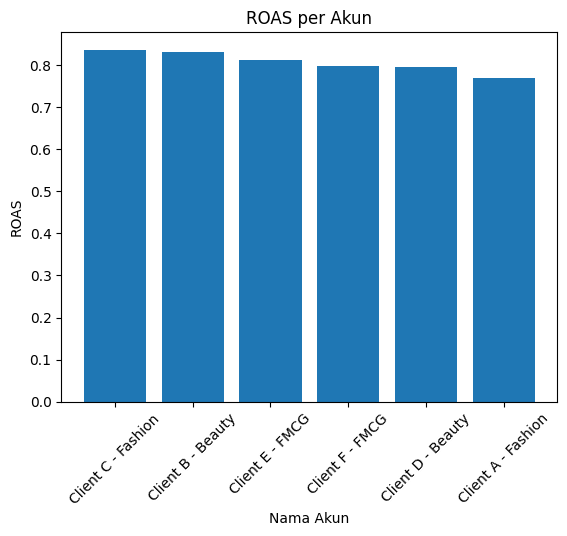

In [58]:
# C3. Visualisasi ROAS per akun
# Membandingkan efisiensi iklan antar klien

grouped = (
    df.groupby('account_name')[['purchase_value', 'amount_spent']]
      .sum()
)

roas_by_account = (
    grouped['purchase_value'] / grouped['amount_spent']
).sort_values(ascending=False)

plt.figure()
plt.bar(roas_by_account.index, roas_by_account.values)
plt.xlabel('Nama Akun')
plt.ylabel('ROAS')
plt.title('ROAS per Akun')
plt.xticks(rotation=45)
plt.show()

## Ringkasan Insight

- CTR iklan berada di kisaran ±10%, menunjukkan iklan cukup efektif menarik perhatian audiens.
- Campaign Traffic memiliki CTR sedikit lebih tinggi dibanding Sales, meskipun keduanya relatif seimbang.
- Iklan menghasilkan total omzet sekitar 10,5 miliar, menandakan kontribusi signifikan terhadap pendapatan.
- ROAS keseluruhan sekitar 0,8, menunjukkan efisiensi iklan masih perlu ditingkatkan.
- Performa iklan berfluktuasi dengan kecenderungan meningkat di akhir tahun.
- Peningkatan performa paling terlihat pada periode April–Mei dan Oktober–November.
- Omzet iklan bersifat musiman dengan puncak di April dan kenaikan kembali menjelang akhir tahun.
- Industri Fashion mencatat rata-rata omzet tertinggi dibandingkan industri lainnya.
- Akun dari industri Fashion menghasilkan total omzet lebih tinggi dan lebih konsisten.
- Industri Fashion memiliki ROAS tertinggi, menandakan efisiensi iklan yang lebih baik.